<a href="https://colab.research.google.com/github/DuongDuyThoai/bai-tap-AI/blob/main/nhandienhoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/nhan_dien_hoa

/content/gdrive/MyDrive/Colab Notebooks/nhan_dien_hoa


In [ ]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_data.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/nhan_dien_hoa/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 75 images belonging to 3 classes.


In [ ]:
test_set = train_data.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/nhan_dien_hoa/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 15 images belonging to 3 classes.


In [ ]:
train_set.class_indices

{'hoa cam tu cau': 0, 'hoa hong': 1, 'hoa ly': 2}

In [ ]:
test_set.class_indices

{'camtucau': 0, 'hoahong': 1, 'hoaly': 2}

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_set,epochs=100,batch_size=128,verbose=1)

3/3 [==============================] - 1s 164ms/step - loss: 3.4563e-04 - accuracy: 1.0000
Epoch 90/100
3/3 [==============================] - 1s 158ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 91/100
3/3 [==============================] - 1s 244ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 92/100
3/3 [==============================] - 1s 154ms/step - loss: 1.1594e-04 - accuracy: 1.0000
Epoch 93/100
3/3 [==============================] - 1s 241ms/step - loss: 6.8493e-04 - accuracy: 1.0000
Epoch 94/100
3/3 [==============================] - 1s 160ms/step - loss: 9.1140e-04 - accuracy: 1.0000
Epoch 95/100
3/3 [==============================] - 1s 145ms/step - loss: 1.7437e-04 - accuracy: 1.0000
Epoch 96/100
3/3 [==============================] - 1s 151ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 97/100
3/3 [==============================] - 1s 161ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 98/100
3/3 [==============================] - 1s 253ms/step - loss: 0.0048 - accuracy: 

In [ ]:
model.save('Nhan_dien_hoa.h5')

In [ ]:
model_hoa = load_model('Nhan_dien_hoa.h5')

In [ ]:
Score=model.evaluate(train_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.00018081869347952306
Train Accuracy 1.0


1/1 [==============================] - 0s 85ms/step
Đây là hoa: camtucau


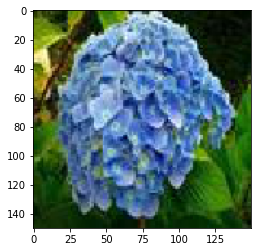

In [ ]:
img = load_img('/content/camtucau (3).jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_hoa.predict(img)
class_hoa=['camtucau','hong','ly']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là hoa:", class_hoa[a])

1/1 [==============================] - 0s 432ms/step
Đây là hoa: hong


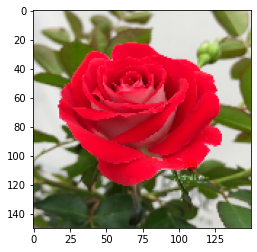

In [ ]:
img = load_img('/content/IMG_1741.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
class_hoa=['camtucau','hong','ly']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là hoa:", class_hoa[a])

In [ ]:
!jupyter nbconvert --to html "/content/nhandienhoa.ipynb"

[NbConvertApp] Converting notebook /content/nhandienhoa.ipynb to html
[NbConvertApp] Writing 520573 bytes to /content/nhandienhoa.html
